# Importing library :

In [1]:
# Importing library's we put there kmeans clustering  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
%matplotlib inline 

# Reading file 

In [2]:
# Reading file 
df = pd.read_csv("1673873388_rolling_stones_spotify.csv")

In [3]:
# checking head of the dataset
df.head(5)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,6/10/2022,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,6/10/2022,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,6/10/2022,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,6/10/2022,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,6/10/2022,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
# taking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [5]:
# converting object to datetime formate
df['release_date'] = pd.to_datetime(df['release_date'], errors ='coerce')

In [6]:
# checking datatype
df.dtypes

Unnamed: 0                   int64
name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
id                          object
uri                         object
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object

In [7]:
# finding null counts
null_counts = pd.isnull(df).sum()
null_counts

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [8]:
# checking dataset values
df['unnamed'] = pd.value_counts(df["Unnamed: 0"])
df['unnamed']

0       1
1       1
2       1
3       1
4       1
       ..
1605    1
1606    1
1607    1
1608    1
1609    1
Name: unnamed, Length: 1610, dtype: int64

In [9]:
column_drop = df.drop(columns=['Unnamed: 0'],inplace = True)


In [10]:
# finding correlation between these features
corr_matrix = df[['popularity','acousticness','danceability','energy','instrumentalness','liveness',
                  'loudness','speechiness','tempo','valence']].corr()

# How a song's popularity relates to various factors and how this has changed over time

* We observe that many variables (features) are correlating the main target variable here are some variables 
    * loudness | energy 
    * danceability | valennce
    * energy | speechiness

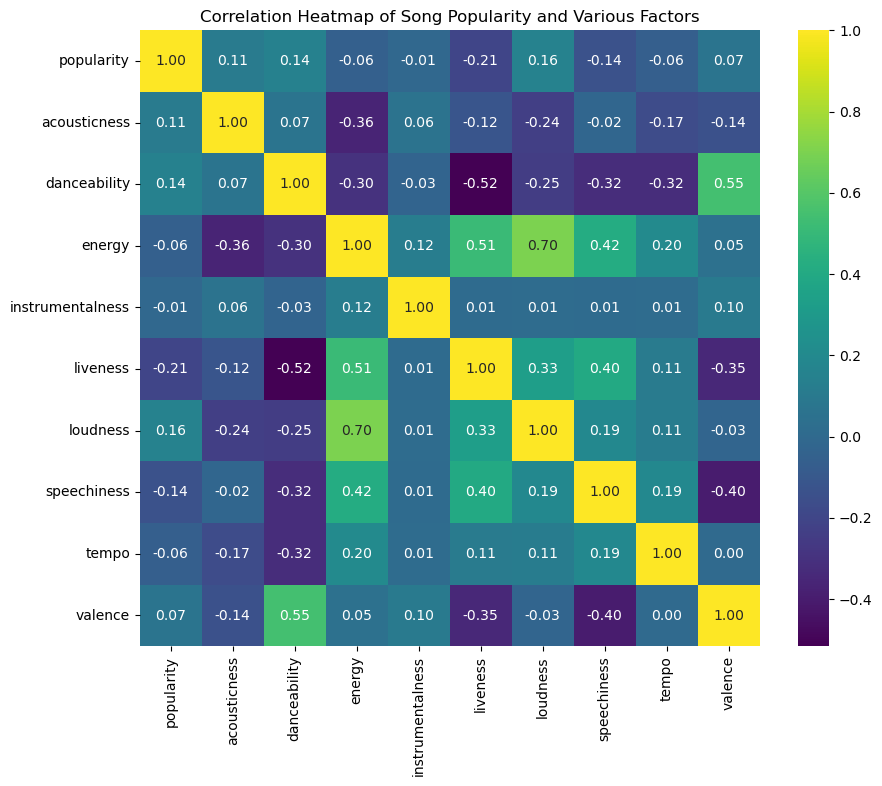

In [11]:
# plotting Heatmap
plt.figure(figsize=(10, 8), facecolor='white')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', cbar=True)
plt.title('Correlation Heatmap of Song Popularity and Various Factors')
plt.show()

# Dimensionality reduction techniques are crucial in data science, especially in the context of large datasets with many features
* Noise Reduction: By reducing the number of dimensions, we can eliminate irrelevant or redundant features, which often represent noise. This helps in improving the performance of machine learning models by focusing on the most relevant features.
* Improved Visualization: High-dimensional data is challenging to visualize.
* Efficiency: Reducing the number of dimensions can significantly decrease the computational cost of processing data.
* Avoiding Overfitting: In machine learning, having too many features relative to the number of observations can lead to overfitting, where the model performs well on training data but poorly on unseen data. Reducing the number of features helps mitigate this risk.
* Interpretability: Fewer dimensions can lead to simpler, more interpretable models.



In [12]:
feature = df[['acousticness','danceability','energy','instrumentalness',
              'liveness','loudness','speechiness','tempo','valence']]
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(feature)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

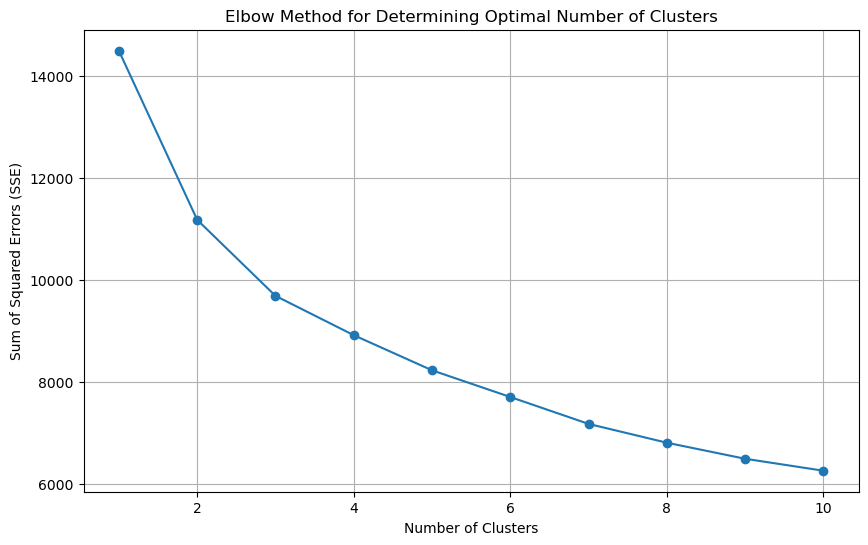

In [13]:
# calculating sum of squared error for fitting the model    
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_feature)
    sse.append(kmeans.inertia_)
# making elbow plot for visualization 
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_feature)

# Adding cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Displaying the first few rows with cluster labels and calculating the mean of features for each cluster
display_data = df[['name', 'album', 'cluster']].head()
cluster_means = df.groupby('cluster')[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                                       'loudness', 'speechiness', 'tempo', 'valence']].mean()

print(display_data)
print(cluster_means)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                          name               album  cluster
0   Concert Intro Music - Live  Licked Live In NYC        0
1   Street Fighting Man - Live  Licked Live In NYC        0
2           Start Me Up - Live  Licked Live In NYC        0
3  If You Can't Rock Me - Live  Licked Live In NYC        0
4          Donâ€™t Stop - Live  Licked Live In NYC        0
         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.183773      0.360111  0.924077          0.159124  0.820780   
1            0.186005      0.563683  0.821017          0.221647  0.304578   
2            0.430486      0.490807  0.570844          0.093101  0.289829   

         loudness  speechiness       tempo   valence  
cluster                                               
0       -5.379530     0.106407  137.862128  0.449007  
1       -6.572217     0.048534  122.164377  0.788788  
2       -9.720756     0.046867  11